In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
# Assuming your dataset is in a CSV file named 'adidas_sales.csv'
addidas = pd.read_excel("C:\\Users\\HP\\Desktop\\Course\\Datas\\Adidas US Sales SLR.xlsx")
addidas


,Unnamed: 0,Retailer,Units Sold,Operating Profit
0,NaN,Foot Locker,1200,300000.00
1,NaN,Foot Locker,1000,150000.00
2,NaN,Foot Locker,1000,140000.00
3,NaN,Foot Locker,850,133875.00
4,NaN,Foot Locker,900,162000.00
...,...,...,...,...
9643,NaN,Foot Locker,64,896.00
9644,NaN,Foot Locker,105,1377.60
9645,NaN,Foot Locker,184,2791.28
9646,NaN,Foot Locker,70,1234.80


In [7]:
import statsmodels.api as sm

In [10]:
# Add a constant term to the independent variable (Units Sold)
X = sm.add_constant(addidas['Units Sold'])
X



,const,Units Sold
0,1.0,1200
1,1.0,1000
2,1.0,1000
3,1.0,850
4,1.0,900
...,...,...
9643,1.0,64
9644,1.0,105
9645,1.0,184
9646,1.0,70


In [11]:
# Dependent variable (Operating Profit)
y = addidas['Operating Profit']
y

0       300000.00
1       150000.00
2       140000.00
3       133875.00
4       162000.00
          ...    
9643       896.00
9644      1377.60
9645      2791.28
9646      1234.80
9647       649.89
Name: Operating Profit, Length: 9648, dtype: float64

In [12]:

# Fit the regression model
model = sm.OLS(y, X).fit()
model


In [13]:
# Get the regression coefficients
intercept, slope = model.params

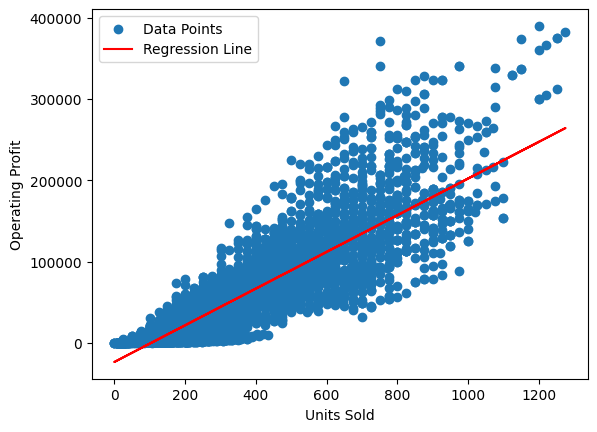

In [14]:
import matplotlib.pyplot as plt

# Scatter plot of the data
plt.scatter(addidas['Units Sold'], addidas['Operating Profit'], label='Data Points')

# Plot the regression line
plt.plot(addidas['Units Sold'], intercept + slope * addidas['Units Sold'], color='red', label='Regression Line')

plt.xlabel('Units Sold')
plt.ylabel('Operating Profit')
plt.legend()
plt.show()


In [15]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Operating Profit   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 3.772e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:21:12   Log-Likelihood:            -1.1118e+05
No. Observations:                9648   AIC:                         2.224e+05
Df Residuals:                    9646   BIC:                         2.224e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.357e+04    388.809    -60.618      0.0